# **🐦 Real prediction Dissaster Tweets** 🐦

Predict if a tweet is real or not

## **Parte 1: Importar los datos**

Install Keras in Colab

In [1]:
!pip install keras-core --upgrade
!pip install -q keras-nlp --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.1/792.1 kB 10.4 MB/s eta 0:00:00


Importar tednsorflow from Keras

In [2]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [3]:
# prompt: importa pandas, matplotlib, tensorflow, keras, sklearn, confusion matrix, seaborn y pyplot

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns


Cargar los datos del data set

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Modelos Kaggle/train (1).csv')
df_test = pd. read_csv('/content/drive/MyDrive/Colab Notebooks/Modelos Kaggle/prediction_test.csv')


In [5]:
df_test.sample(10)

,id,keyword,location,text
83,286,ambulance,World,2 held with heroin in ambulance http://t.co/d9...
574,1868,burned,NYC ?? PA,I'm proud of my heart it's been played stabbed...
171,555,arson,ITUNES RADIO [Hiphop/Rap],#BreakingNews Mourning notices for stabbing ar...
483,1566,bomb,SHIBUYA TOKYO JAPAN,&lt;Kyodonews&gt; UPDATE1: Hiroshima marks 70t...
1095,3606,desolation,NaN,Free Kindle Book - Aug 3-7 - Thriller - Desola...
1927,6498,injuries,North Carolina,@RVacchianoNYDN @NYDNSports glad to see a care...
2068,6947,massacre,Kenya,#FromTheDesk of King George Kenyatta Muumbo at...
2203,7375,obliterate,? they/them ?,mirajane as satan soul could obliterate me and...
1757,5940,hazard,Karma,Whoever got compared with Hazard faded away on...
1016,3343,demolished,"Bolton, England",@OpTic_DKarma dude they demolished you!


In [ ]:
df_train.sample(10)

,id,keyword,location,text,target
3771,5354,fire,"Yuba City, CA",When your heart is bigger than the obstacles ...,0
7461,10677,wounds,Earth: Senseless nonsense,Explosion in Gaza Strip kills four wounds 30; ...,1
7309,10461,wild%20fires,"Olathe, KS",Man! What I would give to be in CA right now t...,1
5486,7828,quarantine,NaN,Yet another company trying to censor the Inter...,0
668,963,blaze,"Penn Hills, PA",I liked a @YouTube video http://t.co/N95IGskd3...,0
3645,5194,fatalities,San Francisco,'Motordom' lobbied to change our language arou...,0
3954,5621,flooding,Metro Manila,@adorableappple No reported flooding po in the...,0
7190,10302,weapon,"UK,singer,songwriter,?2 act",@Weapon_X_music hey guys thanks for a rock in ...,0
5017,7157,mudslide,London,The 19 year old's smug face when Dorret brings...,0
6521,9325,survive,? icon by @Hashiren_3 ?,@mochichiiiii @hikagezero IT'S IMPOSSIBLE FOR ...,0


# 🔍 **Explorar el dataset**

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


El df test tiene 4 columnas más que que el df_train

In [8]:
print("Estructura del df_train")
df_train.describe()

Estructura del df_train


,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [9]:
print("Estructura del df_train")
df_test.describe()

Estructura del df_train


,id
count,3263.000000
mean,5427.152927
std,3146.427221
min,0.000000
25%,2683.000000
50%,5500.000000
75%,8176.000000
max,10875.000000


El df train tiene más datos para el modelo que el df_test

In [10]:
print(df_test.shape)
print(df_train.shape)

(3263, 4)
(7613, 5)


el df test tiene menos datos que el df_train

In [11]:
print("Columnas de df_train:")
print(df_train.columns)

print("\nColumnas de df_test:")
df_test.columns


Columnas de df_train:
Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

Columnas de df_test:


Index(['id', 'keyword', 'location', 'text'], dtype='object')

Graficar las 30 causas más comunes de los accidentes o desastres que se producen, de los datos de entrenamiento

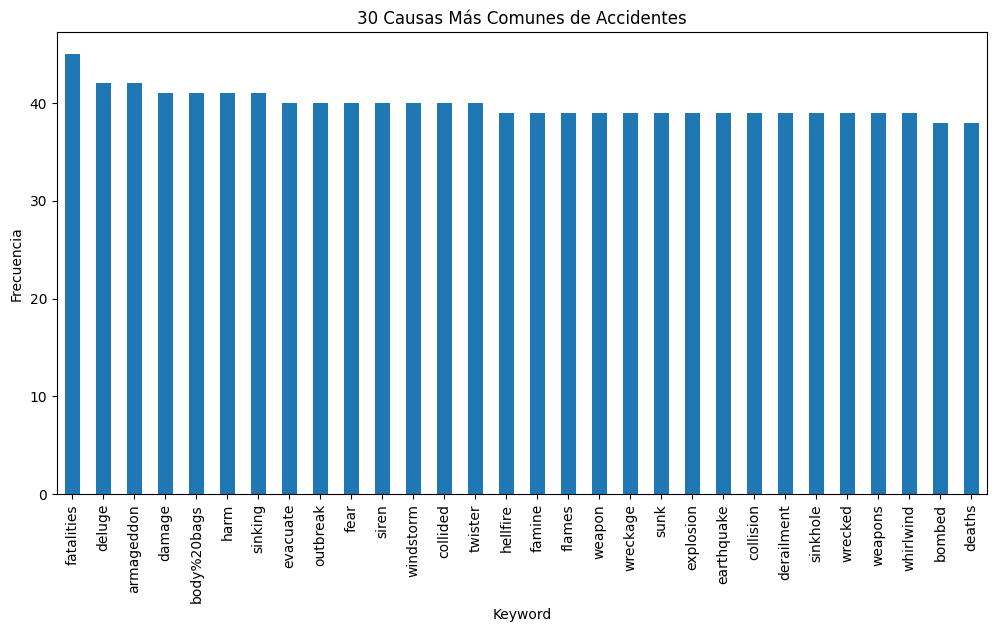

In [12]:
# prompt: Grafica las 30 causas más comunes de accidentes que se producen

import matplotlib.pyplot as plt
# Graficar las 30 causas más comunes de los accidentes o desastres que se producen, de los datos de entrenamiento
plt.figure(figsize=(12, 6))
df_train['keyword'].value_counts().nlargest(30).plot(kind='bar')
plt.title('30 Causas Más Comunes de Accidentes')
plt.xlabel('Keyword')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


El accidente más común son las inundaciones, seguido por la demolición y la niebla

Variable objetivo: buscar y revisar si se presentó el desastre o no

In [13]:
# Variable objetivo: buscar y revisar si se presentó el desastre o no
# Assuming 'target' column represents disaster occurrence (1 for disaster, 0 for no disaster)
# If the 'target' column doesn't exist, create it based on your criteria.

if 'target' not in df_train.columns:
    # Example:  If 'keyword' is not 'no_disaster', it is considered a disaster.
    # Adapt this logic according to your dataset's actual meaning
    df_train['target'] = df_train['keyword'].apply(lambda x: 0 if x == 'no_disaster' else 1)
    # You should replace this lambda function with your actual logic
    # to determine the disaster based on the available columns.

if 'target' not in df_test.columns:
  # You must infer the 'target' variable for the test dataset
  # based on the same criteria as the training dataset.
  df_test['target'] = df_test['keyword'].apply(lambda x: 0 if x == 'no_disaster' else 1)


# Now 'target' column is present in both DataFrames
print(df_train.head())  #Verify 'target' column
print(df_test.head()) # Verify 'target' column


   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text  \
0   0     NaN      NaN                 Just happened a terrible car crash   
1   2     NaN      NaN  Heard about #earthquake is different cities, s...   
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...   
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires   
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan   

  

target
0    4342
1    3271
Name: count, dtype: int64


<ipython-input-14-620a2f6e774d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df_train, palette='Set2')


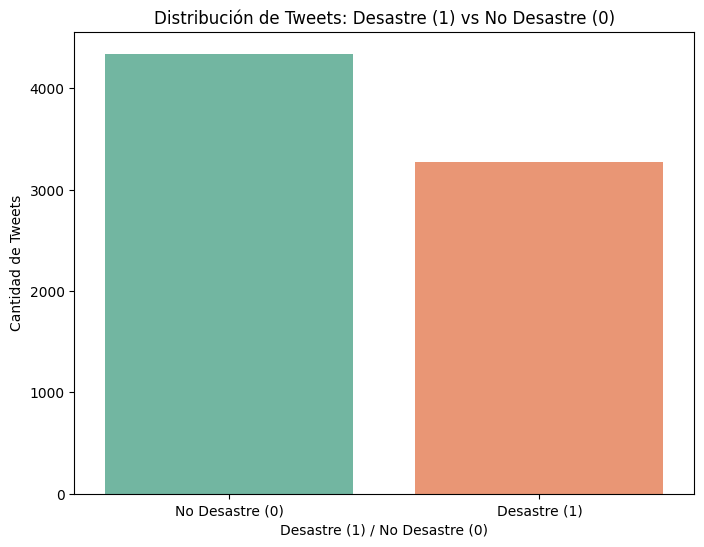

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Modelos Kaggle/train (1).csv')

# Verifica distribución
print(df_train['target'].value_counts())

# Gráfico
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df_train, palette='Set2')
plt.title('Distribución de Tweets: Desastre (1) vs No Desastre (0)')
plt.xlabel('Desastre (1) / No Desastre (0)')
plt.ylabel('Cantidad de Tweets')
plt.xticks([0, 1], ['No Desastre (0)', 'Desastre (1)'])
plt.show()


Cantidad de datos etiquetados como desastre menor a los etiquetados como no desastre en el dataset en Twitter, no se calcula desviación estándar porque estamos haciendo conteos no calculando proporcionan

## Proporción a los datos reales

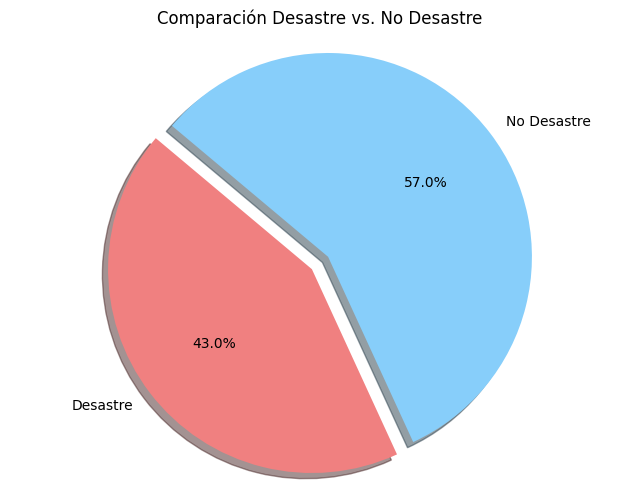

In [15]:
# prompt: Genera un diagrama de pastel donde se compare el desastre vs el no desastre

import matplotlib.pyplot as plt

# Assuming df_train is already loaded and contains the 'target' column
# as shown in the previous code.

# Count the occurrences of disaster and non-disaster
disaster_count = df_train['target'].value_counts()[1]
no_disaster_count = df_train['target'].value_counts()[0]

# Create the pie chart
labels = ['Desastre', 'No Desastre']
sizes = [disaster_count, no_disaster_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Comparación Desastre vs. No Desastre')
plt.show()


Se obsera que no hay demasiada paridad en el reporte de los accidentes puesto que más de la mitad estan registrados como no desastre. Sin embargo hay una cantidad considerable de accidentes

## **Limpiar el texto a analizar**

Reemplazar y ajustar los caracteres especiales del texto

In [16]:
import re

def clean_text(text):
  # Remove URLs
  text = re.sub(r'http\S+', '', text)
  # Remove special characters and numbers
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  # Convert to lowercase
  text = text.lower()
  return text

# Example usage (assuming df_train and df_test are defined)
df_train['text'] = df_train['text'].apply(clean_text)
df_test['text'] = df_test['text'].apply(clean_text)


Se van a reemplazar loa valores nulos y nan con uknown

In [17]:
df_train['keyword'] = df_train['keyword'].fillna('unknown')
df_test['keyword'] = df_test['keyword'].fillna('unknown')
df_train['location'] = df_train['location'].fillna('unknown')
df_test['location'] = df_test['location'].fillna('unknown')


Ver los primeros 10 datos del Data Frame

In [18]:
# Sample the DataFrame
df_sample = df_train.sample(10)  # Change 3 to your desired sample size

df_sample



,id,keyword,location,text,target
6772,9704,tornado,unknown,i feel like a tornado,1
3853,5482,flames,St. Patrick's Purgatory,tadhgtgmtel dude was just smoking and the fuck...,1
5011,7147,mudslide,"Ealing, London",it looks like a mudslide and gbbo is back with...,1
4783,6806,loud%20bang,Why should you know?,chibi head it hit the wall behind him with a l...,1
1132,1632,bombing,Shipwreck Cove,its been years and one hour since the bombing...,1
5554,7926,rainstorm,"La Puente, CA",stuck in a rainstorm stay toward the middle of...,0
4335,6156,hijack,unknown,criminals who hijack lorries and buses arreste...,1
2864,4116,drought,"San Francisco , CA",its time to do away with droughtcheck out how ...,1
2976,4273,drowning,"Madison, WI",nigeltanner believe it or not weve had too muc...,1
838,1217,blizzard,unknown,first time playing hearthstone on pc thoughts,0


Como se observa se han reemplazado los valores por los que se samplearon en cada uno de los arreglos

# **Preparación del modelo de IA**

Lo primero que se realiza es la tokenización del texto
tokenizar, significa que vamos a dividir el texto en partes más pequeñas, para convertir el texto en algo procesable por el modelo

## Desarrollo de la tokenización

In [19]:
import keras_nlp
import tensorflow as tf

# Configuración
max_tokens = 100
max_sequence_length = 100

# Convertimos el texto a un tf.data.Dataset
text_dataset = tf.data.Dataset.from_tensor_slices(df_train['text'].values)

# Computamos el vocabulario WordPiece
vocab = keras_nlp.tokenizers.compute_word_piece_vocabulary(
    data=text_dataset,
    vocabulary_size=max_tokens
)

# Creamos el tokenizador
tokenizer = keras_nlp.tokenizers.WordPieceTokenizer(
    vocabulary=vocab,
    lowercase=True
)

# Tokenizamos cada texto
def text_to_sequence(text):
    tokens = tokenizer.tokenize(text)
    return tokens.numpy().tolist()

# Aplicamos el tokenizador (conversión a secuencias)
df_train['sequence'] = df_train['text'].apply(lambda x: text_to_sequence(tf.constant(x)))
df_test['sequence'] = df_test['text'].apply(lambda x: text_to_sequence(tf.constant(x)))

# Recortamos secuencias largas
df_train['sequence'] = df_train['sequence'].apply(lambda x: x[:max_sequence_length])
df_test['sequence'] = df_test['sequence'].apply(lambda x: x[:max_sequence_length])

# Mostramos ejemplo
print(df_train[['text', 'sequence']].head())



                                                text  \
0  our deeds are the reason of this earthquake ma...   
1              forest fire near la ronge sask canada   
2  all residents asked to shelter in place are be...   
3   people receive wildfires evacuation orders in...   
4  just got sent this photo from ruby alaska as s...   

                                            sequence  
0  [19, 95, 41, 8, 33, 43, 31, 5, 47, 37, 22, 33,...  
1  [67, 51, 32, 10, 92, 47, 18, 33, 83, 16, 40, 2...  
2  [5, 56, 22, 51, 92, 34, 84, 58, 5, 31, 75, 34,...  
3  [20, 33, 38, 50, 57, 22, 33, 65, 92, 55, 27, 9...  
4  [14, 95, 64, 11, 81, 23, 84, 32, 24, 49, 73, 2...  


## Desplegar los datos y las validaciónes de los datos, usar datasets de validación de los datos para el modelo

El padding es para que las secuencias (estructura de Pandas dataframe) tenga las mismas secuencias y el mismo tamaño, esto permite entrenar el modelo y entender su funcionamiento

In [20]:
#Padding y preparación de tensores
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Crear el padding para las secuencias
# Padding a las secuencias
X_train = pad_sequences(df_train['sequence'], maxlen=max_sequence_length, padding='post', truncating='post')
X_test = pad_sequences(df_test['sequence'], maxlen=max_sequence_length, padding='post', truncating='post')

Etiquetar los datos para el despliegue

In [21]:
# prompt: genera el etiquetado de los datos

y_train = df_train['target'].values
y_test = df_test['target'].values


Validaciones de los datos

In [22]:


BATCH_SIZE = 64

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.batch(BATCH_SIZE)



Separar los datos de entrenamiento del modelo, de los de validación del modelo para mayor eficiencia

In [23]:
# prompt: Define el entrenamiento y validación

# Dividir los datos en conjuntos de entrenamiento y validación
from sklearn.model_selection import train_test_split

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Crear datasets de TensorFlow para entrenamiento y validación
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train_final)).batch(BATCH_SIZE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH_SIZE)


Crear los datasets preparados para Tensor Flow, esto es para poder usar el model.fit con el mismo tamaño y la forma de Keras

In [24]:
# Ensure both datasets have the same size
min_size = min(len(X_train_final), len(X_val))
X_train_final = X_train_final[:min_size]
y_train_final = y_train_final[:min_size]
X_val = X_val[:min_size]
y_val = y_val[:min_size]


# Crear datasets de TensorFlow para entrenamiento y validación
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train_final)).batch(BATCH_SIZE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(BATCH_SIZE)

# Print shapes to verify
print("X_train_final shape:", X_train_final.shape)
print("y_train_final shape:", y_train_final.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train_final shape: (1523, 100)
y_train_final shape: (1523,)
X_val shape: (1523, 100)
y_val shape: (1523,)


# **Configurar el modelo**

In [25]:
#Importar las capas del modelo
from tensorflow.keras.models import Sequential
#Capas para procesar lenguaje natural
from tensorflow.keras.layers import Embedding, Conv1D, GlobalAveragePooling2D, Dense, Dropout

Convertir etiquetas a One-Hot Encoding

In [26]:
from tensorflow.keras.utils import to_categorical

#Convierte tus etiquetas a one-hot
y_train_final = to_categorical(y_train_final)
y_val = to_categorical(y_val)

#Obtener el número de las clases
num_clases = y_train_final.shape[1]

Definición de parámetros de clave

In [27]:
vocab_size = max_tokens #Cantidad de tokens únicos en el vocabulario
embedding_dim = 64  #Tamaño del vector que representará cada token
sequence_length = max_sequence_length #Longitud máxima de las secuencias
num_clases = y_train_final.shape[1] #Cantidad de clases posibles

Definción del modelo secuencial

In [29]:
model = Sequential([
    #Capa de embedding: transforma cada token (entero) en un vector de "embedding_dim" dimension
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length), #Corrected typo: Embeddinbg to Embedding

    #Capa convulcional 1D: detecta patrones locales (n-gramas) en los tweets
    Conv1D(128, 5, activation='relu'), #128 filtros de tamaño kernel 5

]

)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
